In [1]:
#Imports for EDA
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Reading in the data
df = pd.read_json('logins.json')
df.sort_values(by='login_time', inplace=True)
df.reset_index(inplace=True, drop=True)

In [3]:
df.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [4]:
df.isnull().sum()

login_time    0
dtype: int64

In [5]:
df.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648279
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [6]:
#Creating 15 minute interval time series spanning from min to max login_times +1 additional spot used in count function
min_time = '1970-01-01 20:00:00'
max_time = '1970-04-13 19:00:00'
time_series = pd.date_range(min_time, max_time, freq='15min')

In [7]:
#Creating the lists for relevant parts of the dates
day_of_month = [date.strftime('%d') for date in time_series[:-1]]
days_of_week = [date.strftime('%w') for date in time_series[:-1]]
month = [date.strftime('%m') for date in time_series[:-1]]
hour = [date.strftime('%H') for date in time_series[:-1]]
weekend = [ dt.weekday()>4 for dt in time_series[:-1]]

In [8]:
#Counting logins per interval and creating the list
def count_logins_in_interval(login_times, time_series):
    i = 1
    j = 0
    #initialize counts list
    counts = [0] * len(time_series)
    
    # Iterate over login_times and time_series
    while i < len(time_series):
        # If all login times are counted, return
        if j >= len(login_times):
            #The last position in the list from this function is always 0
            return counts[:-1]
        
        # Check if the login time falls within the current interval
        if login_times[j] <= time_series[i]:
            counts[i - 1] += 1
            j += 1
        else:
            i += 1

counts = count_logins_in_interval(df['login_time'].tolist(), time_series)

In [9]:
#Remove the unused final time stamp
time_series = time_series[:-1]

In [10]:
#setting the dataframe to a new dataframe with the relevant data
data = { 'Time_Intervals' : time_series, 'Counts' : counts, 'Hour' : hour,  'Day_of_month' : day_of_month, 'Month' : month, 'Day_of_week' : days_of_week, 'Weekend' : weekend }
df = pd.DataFrame(data)

In [11]:
df.head()

,Time_Intervals,Counts,Hour,Day_of_month,Month,Day_of_week,Weekend
0,1970-01-01 20:00:00,2,20,01,01,4,False
1,1970-01-01 20:15:00,6,20,01,01,4,False
2,1970-01-01 20:30:00,9,20,01,01,4,False
3,1970-01-01 20:45:00,7,20,01,01,4,False
4,1970-01-01 21:00:00,1,21,01,01,4,False


In [12]:
df.describe()

,Time_Intervals,Counts
count,9788,9788.000000
mean,1970-02-21 19:22:29.999999999,9.515938
min,1970-01-01 20:00:00,0.000000
25%,1970-01-27 07:41:15,3.000000
50%,1970-02-21 19:22:30,7.000000
75%,1970-03-19 07:03:45,13.000000
max,1970-04-13 18:45:00,73.000000
std,NaN,8.328573


In [13]:
#Checking on the dtypes of columns
df.dtypes

Time_Intervals    datetime64[ns]
Counts                     int64
Hour                      object
Day_of_month              object
Month                     object
Day_of_week               object
Weekend                     bool
dtype: object

In [14]:
#Converting dtypes
df = df.astype({'Hour' : 'int64', 'Day_of_month' : 'int64', 'Month' : 'int64', 'Day_of_week' : 'int64'})
print(df.dtypes)

Time_Intervals    datetime64[ns]
Counts                     int64
Hour                       int64
Day_of_month               int64
Month                      int64
Day_of_week                int64
Weekend                     bool
dtype: object


In [15]:
df['Counts'].unique()

array([ 2,  6,  9,  7,  1,  4,  0,  8,  3, 16, 13, 15, 14, 11, 17, 12, 10,
       18,  5, 21, 22, 23, 19, 29, 25, 32, 27, 26, 20, 24, 34, 28, 45, 30,
       38, 33, 43, 31, 36, 46, 40, 50, 35, 42, 39, 41, 37, 73, 48, 47, 51,
       55, 53, 44, 52, 60, 54, 63, 64, 56, 59, 65], dtype=int64)

In [16]:
df['Hour'].unique()

array([20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19], dtype=int64)

In [17]:
df['Day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [18]:
df['Day_of_week'].unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

In [19]:
df['Month'].unique()

array([1, 2, 3, 4], dtype=int64)

In [20]:
df['Weekend'].unique()

array([False,  True])

In [21]:
#Rows where Counts = 0
df[df['Counts'] == 0]

,Time_Intervals,Counts,Hour,Day_of_month,Month,Day_of_week,Weekend
6,1970-01-01 21:30:00,0,21,1,1,4,False
33,1970-01-02 04:15:00,0,4,2,1,5,False
41,1970-01-02 06:15:00,0,6,2,1,5,False
88,1970-01-02 18:00:00,0,18,2,1,5,False
147,1970-01-03 08:45:00,0,8,3,1,6,True
...,...,...,...,...,...,...,...
9555,1970-04-11 08:45:00,0,8,11,4,6,True
9734,1970-04-13 05:30:00,0,5,13,4,1,False
9736,1970-04-13 06:00:00,0,6,13,4,1,False
9738,1970-04-13 06:30:00,0,6,13,4,1,False


In [22]:
#creating groupby with sum of counts for the day of each month
month_day = df[['Counts','Month', 'Day_of_month', 'Day_of_week']].groupby(by=['Month', 'Day_of_month', 'Day_of_week']).sum()

In [23]:
month_day.head()

Counts
Month Day_of_month Day_of_week        
1     1            4               112
      2            5               681
      3            6               793
      4            0               788
      5            1               459

In [24]:
#reset the index
month_day.reset_index(inplace=True)

In [25]:
#Month_day information
month_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Month         103 non-null    int64
 1   Day_of_month  103 non-null    int64
 2   Day_of_week   103 non-null    int64
 3   Counts        103 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB


In [26]:
month_day.head()

,Month,Day_of_month,Day_of_week,Counts
0,1,1,4,112
1,1,2,5,681
2,1,3,6,793
3,1,4,0,788
4,1,5,1,459


Text(0.5, 1.0, 'Login Counts Per Day')

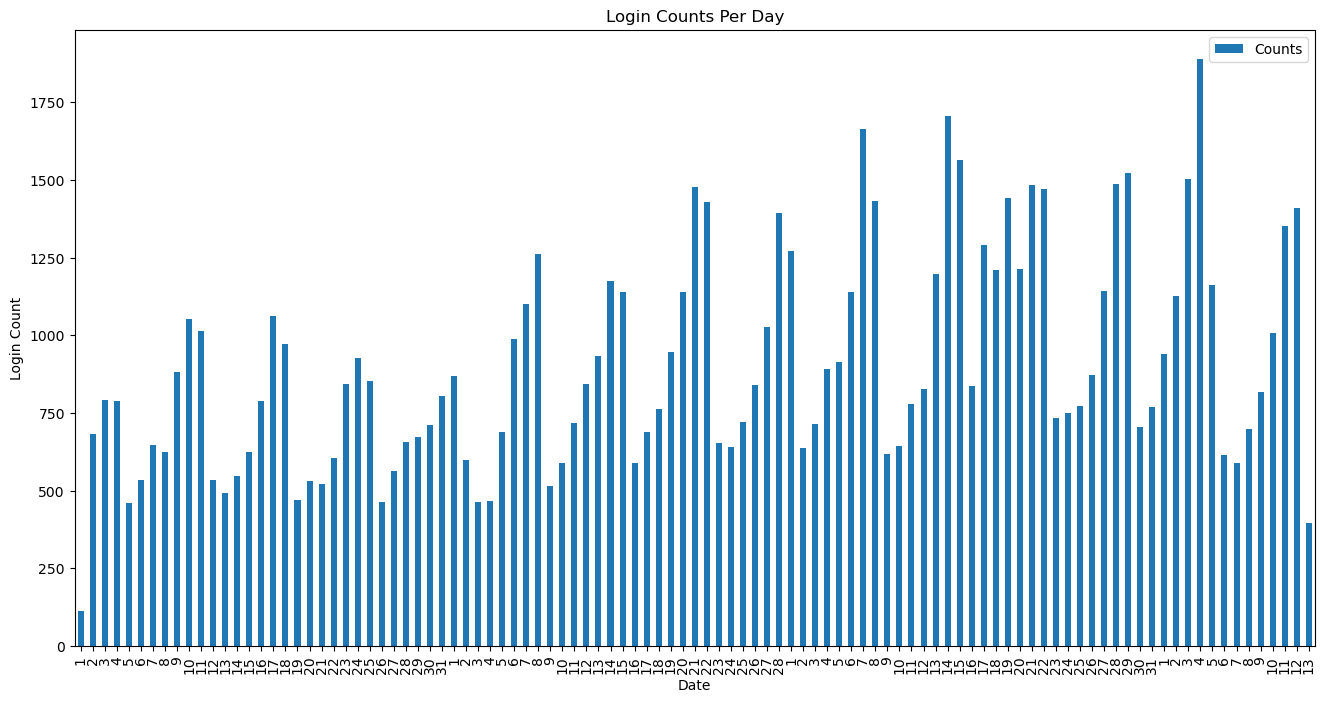

In [27]:
#Plotting the number of login counts for each day
month_day.plot(x='Day_of_month', y='Counts', kind='bar', figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Login Count')
plt.title('Login Counts Per Day')

In [28]:
#creating groupby with sum of counts for each month
monthly_count = df[['Day_of_month','Month', 'Counts']].groupby(by=['Month', 'Day_of_month']).sum()
monthly_count.reset_index(inplace=True)

In [29]:
#Creating dataframe with mean logins per day for each month
daily_average = monthly_count[['Month', 'Counts']].groupby('Month').mean()
daily_average.reset_index(inplace=True)
daily_average['Month'] = ['January', 'Febuarary', 'March', 'April']

In [30]:
daily_average

,Month,Counts
0,January,685.129032
1,Febuarary,881.178571
2,March,1087.838710
3,April,1039.000000


Text(0.5, 1.0, 'Mean Logins Per Day')

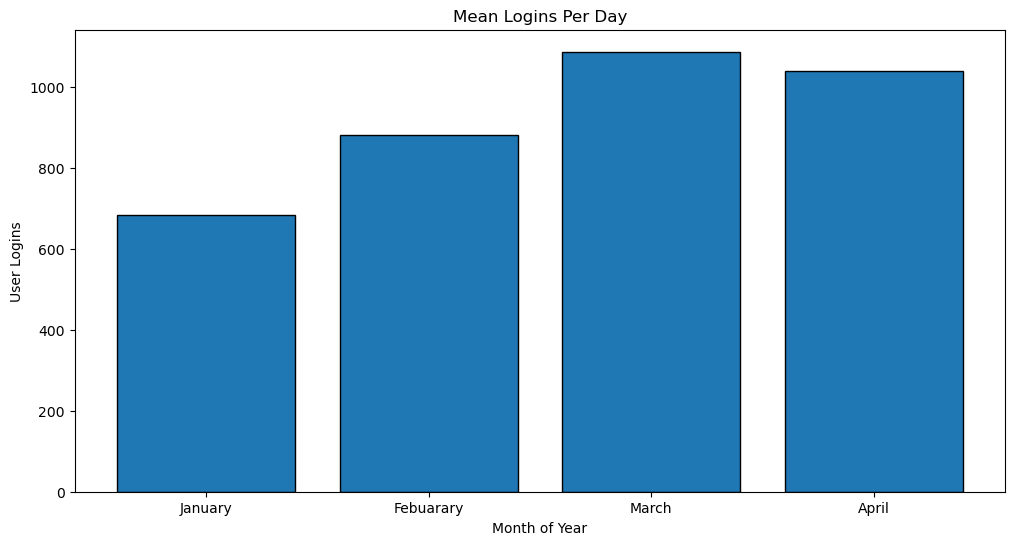

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))

#Creating the plot for the monthly mean logins per day
ax.bar(daily_average['Month'], daily_average['Counts'], width=0.8, align='center', edgecolor='black')

#Labels and title
plt.xlabel('Month of Year')
plt.ylabel('User Logins')
plt.title('Mean Logins Per Day')

In [32]:
#Creating dataframe with mean logins for each hour of the day for weekends
df_weekdays = df[df['Weekend'] == False]
hourly_count_average = df_weekdays[['Hour', 'Counts']].groupby(by='Hour').mean()
hourly_count_average.reset_index(inplace=True)

In [33]:
hourly_count_average

,Hour,Counts
0,0,12.559028
1,1,11.809028
2,2,8.965278
3,3,5.593750
4,4,4.190972
5,5,2.604167
6,6,1.211806
7,7,1.541667
8,8,1.868056
9,9,4.267361


Text(0.5, 1.0, 'Mean Logins Per Hour During Weekdays')

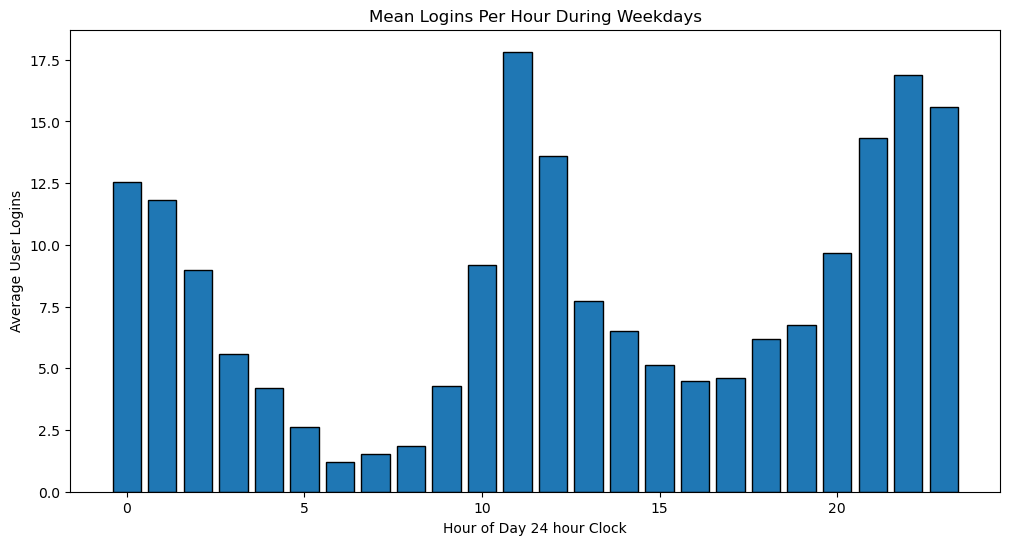

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))

#Creating the plot for the  mean logins for each hour of the day for weekends
ax.bar(hourly_count_average['Hour'], hourly_count_average['Counts'], width=0.8, align='center', edgecolor='black')

#Labels and title
plt.xlabel('Hour of Day 24 hour Clock')
plt.ylabel('Average User Logins')
plt.title('Mean Logins Per Hour During Weekdays')

In [35]:
#Creating dataframe with mean logins for each hour of the day for weekdays
df_weekends = df[df['Weekend'] == True]
hourly_count_average = df_weekends[['Hour', 'Counts']].groupby(by='Hour').mean()
hourly_count_average.reset_index(inplace=True)

In [36]:
hourly_count_average

,Hour,Counts
0,0,19.791667
1,1,24.316667
2,2,26.791667
3,3,26.866667
4,4,31.858333
5,5,18.291667
6,6,6.583333
7,7,3.091667
8,8,2.325000
9,9,2.483333


Text(0.5, 1.0, 'Average Logins Per Hour During Weekends')

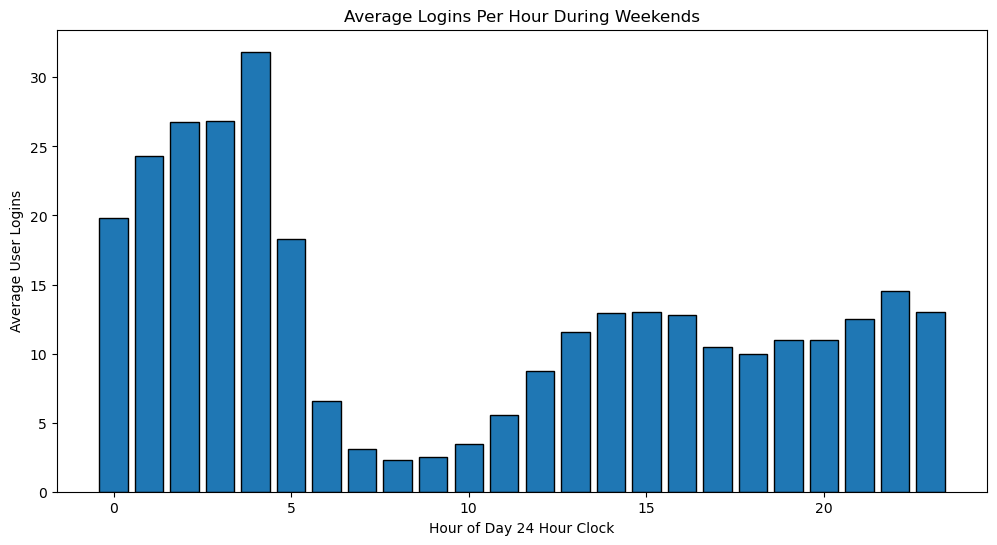

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))

#Creating the plot for the  mean logins for each hour of the day for weekdays
ax.bar(hourly_count_average['Hour'], hourly_count_average['Counts'], width=0.8, align='center', edgecolor='black')

#Labels and title
plt.xlabel('Hour of Day 24 Hour Clock')
plt.ylabel('Average User Logins')
plt.title('Average Logins Per Hour During Weekends')

In [38]:
#Creating a dataframe of total logins per day and whether the day is a weekend or weekday
Weekday_weekend_split = df[['Weekend', 'Day_of_month', 'Counts']].groupby(by=['Weekend', 'Day_of_month']).sum()
Weekday_weekend_split.reset_index(inplace=True)

In [39]:
Weekday_weekend_split

,Weekend,Day_of_month,Counts
0,False,1,1051
1,False,2,3044
2,False,3,2682
3,False,4,1360
4,False,5,2061
5,False,6,3281
6,False,7,1238
7,False,8,1323
8,False,9,2832
9,False,10,2243


In [40]:
#Converting to the mean of logins on weekends and weekdays
Weekday_weekend_split = Weekday_weekend_split[['Weekend', 'Counts']].groupby(by='Weekend').mean()

In [41]:
Weekday_weekend_split

,Counts
Weekend,
False,1793.516129
True,1877.150000


In [42]:
#Changing index t oread Weekday and Weekend
Weekday_weekend_split['Weekend_days'] = ['Weekday', 'Weekend']
Weekday_weekend_split.set_index('Weekend_days', inplace=True)

Text(0.5, 1.0, 'Average Logins Per Day')

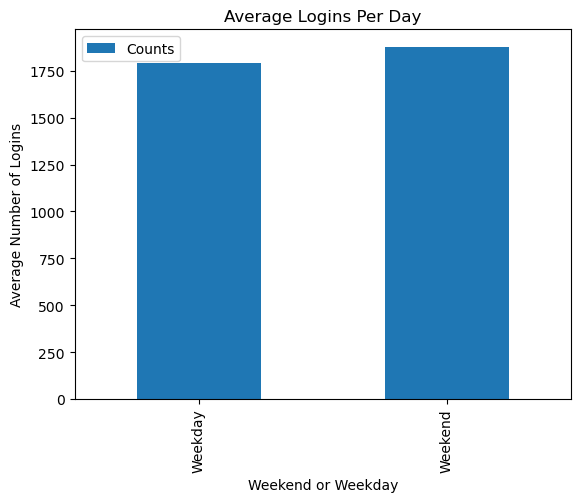

In [43]:
#Simple bar plot
Weekday_weekend_split.plot.bar()

#Labels and title
plt.xlabel('Weekend or Weekday')
plt.ylabel('Average Number of Logins')
plt.title('Average Logins Per Day')